### index to content lexion

In [3]:
from math import log
import tqdm
import json
import numpy as np
import spacy
import matplotlib.pyplot as plt

In [4]:
def countMinMaxAver(lines):
    min_len = 10000
    aver_len = 0
    max_len = 0
    for temp in lines:
        aver_len = aver_len + len(temp)
        if len(temp) < min_len:
            min_len = len(temp)
        if len(temp) > max_len:
            max_len = len(temp)
    aver_len = 1.0 * aver_len / len(lines)
    print('min_len : ' + str(min_len))
    print('max_len : ' + str(max_len))
    print('average_len : ' + str(aver_len))

In [6]:
title_content_lemmatization: dict = np.load("./data/wordnet_lem.npy", allow_pickle=True).tolist()

In [7]:
#core_sememe_dict = np.load("./core_sememe_dict.npy", allow_pickle=True).tolist()

In [8]:
#core_sememe_dict["apple"][0][1]

In [9]:
#core_sememe_dict

In [ ]:
#dict_sememes: list = np.load("./dict_sememes.npy", allow_pickle=True).tolist()

In [301]:
for k, v in title_content_lemmatization.items():
    if len(v) > 15:
        title_content_lemmatization[k] = v[:15]

In [7]:
word_freq = {}
word_set = set()
for doc_words in title_content_lemmatization.values():
    for word in doc_words:
        word_set.add(word)
        if word in word_freq:
            word_freq[word] += 1
        else:
            word_freq[word] = 1

vocab = list(word_set)
vocab_size = len(vocab)

word_id_map = {}
for i in range(vocab_size):
    word_id_map[vocab[i]] = i

print("content lexion: ", vocab_size)

content lexion:  581712


### take max [:3000] in content lexion for sememe (raw)

In [8]:
word_freq_sorted = sorted(word_freq.items(), key = lambda kv:(kv[1], kv[0]))
sememe_raw = [word for (word, _) in word_freq_sorted[-2000:-100]]

In [9]:
"fruit" in sememe_raw

True

In [10]:
word_freq["fruit"]

2708

In [11]:
title_sememe_raw = {}
for k, v in tqdm.tqdm(title_content_lemmatization.items()):
    sememe = []
    for w in v:
        if w in sememe_raw:
        #if w in dict_sememes:
            sememe.append(w)
    if len(sememe) == 0:
        continue
    title_sememe_raw[k] = sememe

print("take max [:3000] in content lexion for sememe (raw)")
countMinMaxAver(title_sememe_raw)

100%|█████████████████████████████████| 809578/809578 [03:52<00:00, 3488.97it/s]


take max [:3000] in content lexion for sememe (raw)
min_len : 1
max_len : 211
average_len : 8.882784122966193


### for building TF-IDF on the content lexion

In [12]:
sememe_freq["tree"]

NameError: name 'sememe_freq' is not defined

In [13]:
sememe_freq = {}
sememe_set = set()
for doc_sememes in title_sememe_raw.values():
    for sememe in doc_sememes:
        sememe_set.add(sememe)
        if sememe in sememe_freq:
            sememe_freq[sememe] += 1
        else:
            sememe_freq[sememe] = 1

sememe_lexion = list(sememe_set)
sememe_lexion_size = len(sememe_lexion)

sememe_id_map = {}
for i in range(sememe_lexion_size):
    sememe_id_map[sememe_lexion[i]] = i

print("sememe lexion size: ", sememe_lexion_size)

sememe lexion size:  1900


In [14]:
sememe_fequncy = [count for (_, count) in word_freq_sorted[-10000:]]

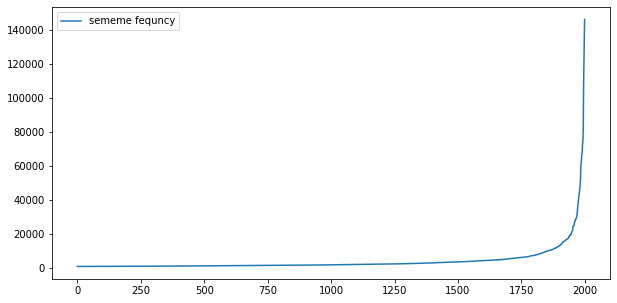

In [15]:
x = range(len(sememe_fequncy[-2000:]))
y = sememe_fequncy[-2000:]
plt.figure(figsize=(10, 5))
plt.plot(x, y, label="sememe fequncy")
plt.legend()
plt.show()

In [16]:
doc_word_freq = {}
for doc_id,(_, doc_words) in enumerate(title_sememe_raw.items()):
    for word in doc_words:
        word_id = sememe_id_map[word]
        doc_word_str = str(doc_id) + ',' + str(word_id)
        if doc_word_str in doc_word_freq:
            doc_word_freq[doc_word_str] += 1
        else:
            doc_word_freq[doc_word_str] = 1
            
word_doc_list = {}
for i,(_, doc_words) in enumerate(title_sememe_raw.items()):
    appeared = set()
    for word in doc_words:
        if word in appeared:
            continue
        if word in word_doc_list:
            doc_list = word_doc_list[word]
            doc_list.append(i)
            word_doc_list[word] = doc_list
        else:
            word_doc_list[word] = [i]
        appeared.add(word)
        
word_doc_freq = {}
for word, doc_list in word_doc_list.items():
    word_doc_freq[word] = len(doc_list)
    
tfidf_word2doc_all = {}
for i,(title, doc_words) in enumerate(title_sememe_raw.items()):
    doc_word_set = set()
    for word in doc_words:
        if word in doc_word_set or word == title:
            continue
        j = sememe_id_map[word]
        key = str(i) + ',' + str(j)
        freq = doc_word_freq[key]
        idf = log(1.0 * len(title_sememe_raw) / word_doc_freq[sememe_lexion[j]])
        tfidf_word2doc_all[key] = freq * idf
        doc_word_set.add(word)

In [17]:
tfidf_word2doc_all

{'0,66': 10.566938185567876,
 '0,1128': 6.695327840609624,
 '0,1382': 4.9630505100344715,
 '0,744': 11.143103773078836,
 '0,714': 4.107777061572949,
 '0,1587': 5.4662715344152435,
 '0,1317': 6.010849444986126,
 '1,270': 18.521861563782906,
 '1,1396': 5.038686366366247,
 '1,659': 6.2499782920209155,
 '1,1707': 5.282267891438304,
 '1,152': 6.025887322350666,
 '1,783': 5.087370678692876,
 '1,702': 6.2059387306100815,
 '1,1606': 4.332684036240783,
 '1,1461': 4.890501627688301,
 '1,683': 4.778187655811845,
 '1,1096': 4.479911069999743,
 '1,224': 5.438872560227129,
 '1,1413': 4.779275992578077,
 '1,419': 4.794085660819586,
 '1,454': 6.302686072645053,
 '1,1437': 6.0145877670967325,
 '1,768': 6.784246651557656,
 '1,1798': 6.643664700936467,
 '1,893': 5.451233657050703,
 '1,755': 5.878796134236366,
 '1,749': 4.868037786977172,
 '1,1047': 6.310208047099742,
 '1,1037': 5.581622465103014,
 '2,1786': 6.26269706442869,
 '2,1245': 6.33569795731318,
 '2,546': 6.621660338885435,
 '2,1248': 6.954245523

### TF-IDF threshold == 10

In [30]:
title_list = [word for word in title_sememe_raw.keys()]
tfidf_filter = {}
for title, tfidf in tfidf_word2doc_all.items():
    if tfidf > 10:
        w, d = title.split(",")
        if title_list[int(w)] not in tfidf_filter.keys():
            tfidf_filter[title_list[int(w)]] = []
        else:
            tfidf_filter[title_list[int(w)]].append(sememe_lexion[int(d)])
print("all lexion size:", len(tfidf_filter))

all lexion size: 188388


* sememe_lower by TF-IDF

In [31]:
title_id_map = {w:i for i,w in enumerate(title_list)}
max_value = 4
sememe_network = {}
for word, sememes in tfidf_filter.items():
    if len(sememes) != 0:
        if len(sememes) > max_value:
            sememe_freq_max_value = {}
            for sememe in sememes:
                tfidf_word2doc_all_key = str(title_id_map[word]) +","+ str(sememe_id_map[sememe])
                sememe_freq_max_value[sememe] = tfidf_word2doc_all[tfidf_word2doc_all_key]
            sememe_lower = sorted(sememe_freq_max_value.items(),key=lambda item:item[1],reverse=True)[:max_value]
            sememe_lower = [sememe_set[0] for sememe_set in sememe_lower]
            sememe_network[word] = sememe_lower
        else:
            sememe_network[word] = sememes
    else:
        continue

* sememe_lower by fequncy

In [410]:
max_value = 4
sememe_network = {}
for word, sememes in tfidf_filter.items():
    if len(sememes) != 0:
        if len(sememes) > max_value:
            sememe_freq_max_value = {}
            for sememe in sememes:
                sememe_freq_max_value[sememe] = sememe_freq[sememe]
            sememe_lower = sorted(sememe_freq_max_value.items(),key=lambda item:item[1],reverse=True)[:max_value]
            sememe_lower = [sememe_set[0] for sememe_set in sememe_lower]
            sememe_network[word] = sememe_lower
        else:
            sememe_network[word] = sememes
    else:
        continue

In [32]:
print("all lexion size:", len(sememe_network))

all lexion size: 80887


In [33]:
sum([len(v) for v in sememe_network.values()])/len(sememe_network)

1.7685660242066092

In [34]:
sememe_network["beauty"]

['art']

In [35]:
word_freq = {}
word_set = set()
for words in sememe_network.values():
    for word in words:
        word_set.add(word)
        if word in word_freq:
            word_freq[word] += 1
        else:
            word_freq[word] = 1

vocab = list(word_set)
vocab_size = len(vocab)

word_id_map = {}
for i in range(vocab_size):
    word_id_map[vocab[i]] = i

print("vocab_size: ", vocab_size)

vocab_size:  1875


In [415]:
" ".join(title_content_lemmatization["apple"])

'edible fruit produce tree malus domestica tree cultivate worldwide grown specie genus malus tree originate central asia wild ancestor malus sieversii today apple grow thousand year asia europe bring north america european colonist apples religious mythological significance culture include norse greek european christian tradition'

In [36]:
{k:v for k, v in sememe_network.items() if "enterprise" in v}

{'skytap': ['cloud', 'enterprise'],
 'villgro': ['enterprise'],
 'sescoi': ['enterprise'],
 'cr-5000': ['board', 'enterprise', 'complex'],
 'openshift': ['platform', 'linux', 'red', 'enterprise'],
 'smartface': ['enterprise'],
 'panorama9': ['enterprise', 'management', 'device'],
 'dragonrad': ['platform', 'mobile', 'application', 'enterprise'],
 '&amp;pictures': ['entertainment', 'enterprise'],
 'mashapps': ['enterprise'],
 'yonyou': ['product', 'management', 'enterprise', 'resource'],
 'assembla': ['enterprise', 'offer'],
 'scotlandwhisky': ['enterprise'],
 'datasplice': ['system', 'software', 'computer', 'enterprise'],
 'suse': ['enterprise', 'distribution', 'variation'],
 'chrony': ['server', 'enterprise'],
 'viasat-3': ['speed', 'enterprise'],
 'dragon1': ['enterprise', 'architecture'],
 'techuspech': ['foundation', 'enterprise'],
 'almalinux': ['enterprise'],
 'sourcehov': ['enterprise', 'solution'],
 'intergator': ['search', 'knowledge', 'enterprise', 'interface'],
 'rreuse': ['

In [417]:
sememe_network

{'culturgen': ['cultural'],
 'cargolifter': ['heavy'],
 'qsound': ['audio', 'process'],
 'homoserine': ['acid'],
 'haploinsufficiency': ['wild', 'variant', 'product', 'standard'],
 'fruitopia': ['brand'],
 'playtex': ['product'],
 'solidar': ['international'],
 'wrqn': ['ohio'],
 'azalai': ['route'],
 'salm-reifferscheid-dyck': ['french'],
 'zwischengoldglas': ['glass', 'vessel'],
 'genshin': ['monk', 'buddhist', 'land', 'maintain'],
 'shakaya': ['meet'],
 'hicas': ['model'],
 'jdom': ['document', 'object', 'model'],
 'ladyfest': ['artist'],
 'naxxar': ['trade'],
 'strikebreaker': ['union'],
 'hankø': ['norwegian', 'king'],
 'mutitjulu': ['rock', 'park'],
 'jamvm': ['virtual', 'machine'],
 'macproject': ['business'],
 'intertitle': ['material'],
 'wbph-tv': ['channel', 'television'],
 'whirlaway': ['crown', 'win', 'stake'],
 'iotacism': ['letter'],
 '1up.com': ['video', 'feature', 'story', 'magazine'],
 'kvea': ['studio', 'television', 'coast', 'los'],
 'telmisartan': ['pressure'],
 'h

In [418]:
sememe_network["apple"]

['asia', 'european']

In [81]:
np.save("sememe_network_dict_en_100-2000",sememe_network)
np.save("sememe_network_cdv_en_100-2000",vocab)